In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix,precision_score, f1_score,accuracy_score,classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv("trainnew.csv")
test=pd.read_csv("testnew.csv")

In [ ]:
test=pd.read_csv("testnew.csv")

In [ ]:
df

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135.0,...,40.0,75.0,16.5,1.0,1.0,22.0,25.0,27.0,0.0,1.0
1,1,70,165,65,89.0,0.6,0.7,2,2,146.0,...,57.0,126.0,16.2,1.0,1.1,27.0,23.0,37.0,1.0,0.0
2,2,20,170,75,81.0,0.4,0.5,1,1,118.0,...,45.0,93.0,17.4,1.0,0.8,27.0,31.0,53.0,0.0,1.0
3,3,35,180,95,105.0,1.5,1.2,1,1,131.0,...,38.0,102.0,15.9,1.0,1.0,20.0,27.0,30.0,1.0,0.0
4,4,30,165,60,80.5,1.5,1.0,1,1,121.0,...,44.0,93.0,15.4,1.0,0.8,19.0,13.0,17.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12964,12964,60,155,70,88.0,0.3,0.8,1,1,132.0,...,59.0,74.0,12.5,1.0,0.7,31.0,18.0,27.0,0.0,1.0
12965,12965,45,160,75,87.0,0.8,0.3,1,1,120.0,...,57.0,124.0,13.7,3.0,1.0,24.0,29.0,42.0,0.0,0.0
12966,12966,45,160,50,64.0,0.7,0.5,1,1,104.0,...,66.0,139.0,13.9,1.0,0.6,19.0,13.0,10.0,1.0,0.0
12967,12967,35,175,75,84.0,1.2,1.5,1,1,124.0,...,67.0,113.0,16.1,2.0,0.9,23.0,19.0,16.0,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12969 entries, 0 to 12968
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   12969 non-null  int64  
 1   age                  12969 non-null  int64  
 2   height(cm)           12969 non-null  int64  
 3   weight(kg)           12969 non-null  int64  
 4   waist(cm)            12969 non-null  float64
 5   eyesight(left)       12969 non-null  float64
 6   eyesight(right)      12969 non-null  float64
 7   hearing(left)        12969 non-null  int64  
 8   hearing(right)       12969 non-null  int64  
 9   systolic             12968 non-null  float64
 10  relaxation           12968 non-null  float64
 11  fasting blood sugar  12968 non-null  float64
 12  Cholesterol          12968 non-null  float64
 13  triglyceride         12968 non-null  float64
 14  HDL                  12968 non-null  float64
 15  LDL                  12968 non-null 

In [ ]:
df.corr()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,1.000000,-0.002238,0.008747,0.013082,0.004415,-0.009012,0.003390,-0.008506,-0.009210,-0.007006,...,-0.008454,-0.002175,0.006553,-0.005427,0.000842,0.001526,0.001222,0.008144,0.005513,0.010158
age,-0.002238,1.000000,-0.479797,-0.329822,-0.035781,-0.275566,-0.258924,0.212229,0.211183,0.164273,...,0.035927,0.107550,-0.281078,-0.000906,-0.142852,0.049417,-0.141625,-0.060223,-0.113909,-0.207190
height(cm),0.008747,-0.479797,1.000000,0.683939,0.400938,0.219025,0.203500,-0.094170,-0.091324,0.063565,...,-0.296830,-0.099491,0.572002,-0.007316,0.469091,0.065455,0.255577,0.243218,0.091416,0.443522
weight(kg),0.013082,-0.329822,0.683939,1.000000,0.827539,0.146662,0.153382,-0.075582,-0.063668,0.241776,...,-0.428233,0.034395,0.531566,-0.028611,0.401056,0.180151,0.446385,0.321213,0.083801,0.356690
waist(cm),0.004415,-0.035781,0.400938,0.827539,1.000000,0.038881,0.052268,-0.008219,0.011582,0.299026,...,-0.442338,0.093195,0.418339,-0.024363,0.302394,0.209029,0.429151,0.313163,0.047072,0.261548
eyesight(left),-0.009012,-0.275566,0.219025,0.146662,0.038881,1.000000,0.444421,-0.070226,-0.077800,-0.025693,...,-0.041980,-0.032347,0.144338,-0.016179,0.078550,0.009860,0.075155,0.048894,0.028313,0.102892
eyesight(right),0.003390,-0.258924,0.203500,0.153382,0.052268,0.444421,1.000000,-0.050677,-0.079905,-0.008419,...,-0.036036,-0.027508,0.139926,-0.005441,0.077042,0.016540,0.081867,0.067542,0.022893,0.102920
hearing(left),-0.008506,0.212229,-0.094170,-0.075582,-0.008219,-0.070226,-0.050677,1.000000,0.547365,0.047406,...,-0.006265,-0.008054,-0.047447,0.003563,0.000055,-0.007023,-0.050367,-0.021643,-0.009874,-0.039801
hearing(right),-0.009210,0.211183,-0.091324,-0.063668,0.011582,-0.077800,-0.079905,0.547365,1.000000,0.039941,...,-0.013816,-0.017413,-0.047076,0.007102,-0.001799,-0.004053,-0.050190,-0.018049,-0.025792,-0.034791
systolic,-0.007006,0.164273,0.063565,0.241776,0.299026,-0.025693,-0.008419,0.047406,0.039941,1.000000,...,-0.123916,0.046020,0.167656,-0.019352,0.059873,0.107031,0.132657,0.170232,0.009573,0.059905


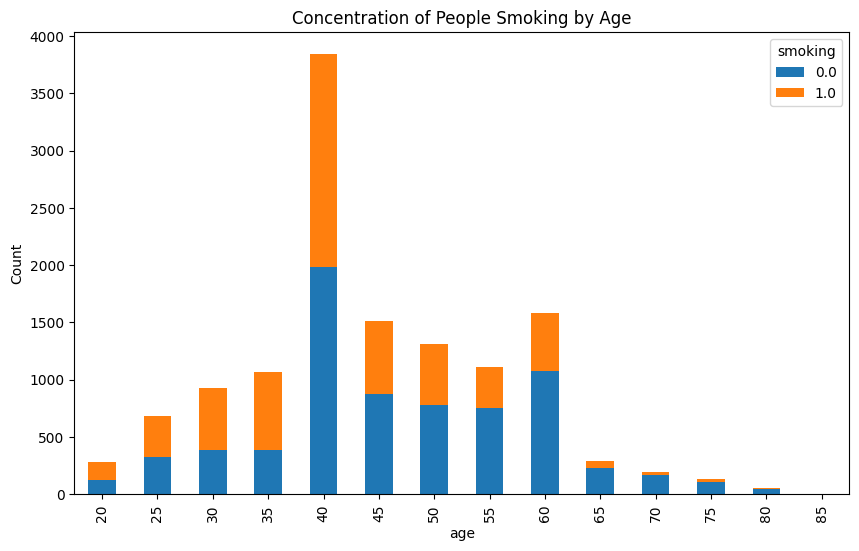

In [ ]:


# Group the data by age and smoking status, and count the number of occurrences
smoking_counts = df.groupby(['age', 'smoking']).size().unstack()

# Plot the bar plot
smoking_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title and labels
plt.title('Concentration of People Smoking by Age')
plt.xlabel('age')
plt.ylabel('Count')

# Show the plot
plt.show()
#thz majority of people who smoke are between 35 and 60 with a very important are in 45

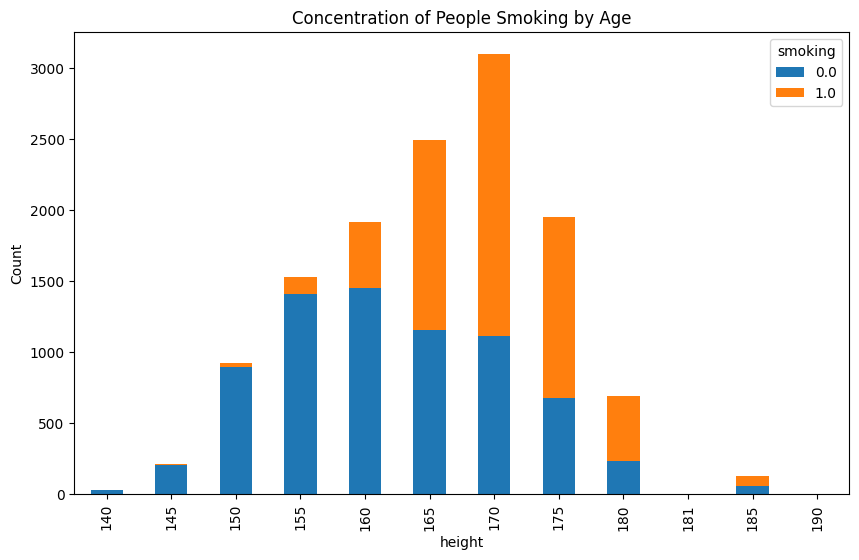

In [ ]:
# Group the data by age and smoking status, and count the number of occurrences
smoking_counts = df.groupby(['height(cm)', 'smoking']).size().unstack()

# Plot the bar plot
smoking_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title and labels
plt.title('Concentration of People Smoking by Age')
plt.xlabel('height')
plt.ylabel('Count')

# Show the plot
plt.show()
#there can be a correlation between height and agevv

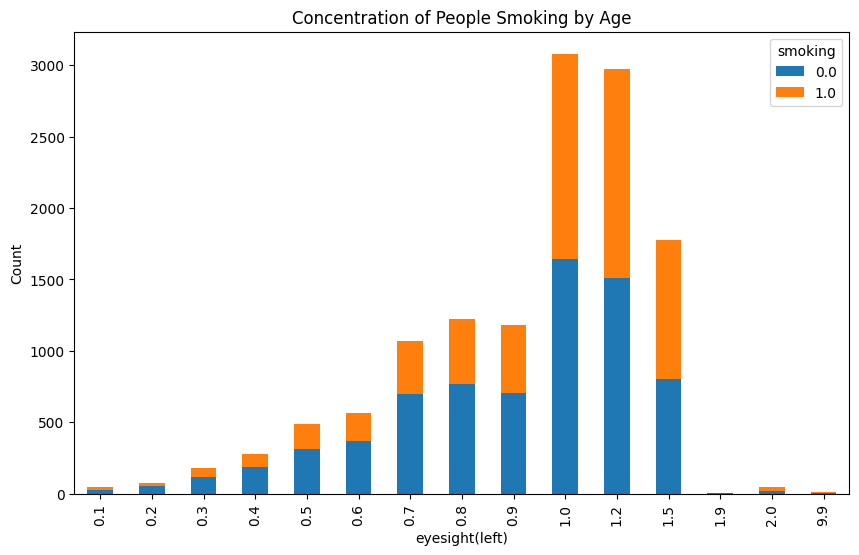

In [ ]:
# Group the data by age and smoking status, and count the number of occurrences
smoking_counts = df.groupby(['eyesight(left)', 'smoking']).size().unstack()

# Plot the bar plot
smoking_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title and labels
plt.title('Concentration of People Smoking by Age')
plt.xlabel('eyesight(left)')
plt.ylabel('Count')

# Show the plot
plt.show()
#there can be a correlation between height and agevv

In [ ]:
df["age"].corr(df["height(cm)"])
#there isnt a correlation ==> we re going to keep these columns

-0.4916725730718449

In [ ]:
#there is a strong corrolation between weight and waist so we re going to drop one of them
df.drop(columns="waist(cm)",inplace=True)

In [ ]:
test.drop(columns="waist(cm)",inplace=True)

In [ ]:
for element in df.columns.drop("smoking"):
  if (df[element].corr(df["smoking"])<0.3):
    df.drop(columns=element,inplace=True)
    test.drop(columns=element,inplace=True)
df

,height(cm),weight(kg),triglyceride,hemoglobin,Gtp,smoking
0,165,60,300,16.5,27.0,1.0
1,165,65,55,16.2,37.0,0.0
2,170,75,197,17.4,53.0,1.0
3,180,95,203,15.9,30.0,0.0
4,165,60,87,15.4,17.0,1.0
...,...,...,...,...,...,...
38635,170,75,107,14.6,31.0,0.0
38636,165,75,152,17.6,49.0,0.0
38637,160,50,48,12.5,10.0,0.0
38638,160,50,105,14.5,48.0,0.0


In [ ]:
test

,height(cm),weight(kg),triglyceride,hemoglobin,Gtp
0,165,70,186.0,14.2,32.0
1,160,60,158.0,13.0,24.0
2,170,70,173.0,15.4,36.0
3,160,50,47.0,14.5,10.0
4,170,75,100.0,16.5,27.0
...,...,...,...,...,...
25986,160,65,108.0,15.3,59.0
25987,160,55,63.0,13.1,13.0
25988,170,65,226.0,14.2,31.0
25989,150,75,151.0,12.6,23.0


In [ ]:
# Calculate the mean value of the column
mean_value = df['Gtp'].mean()

# Fill the column with the mean value
df['Gtp'] = df['Gtp'].fillna(mean_value)

In [ ]:
# Calculate the mean value of the column
mean_value = test['Gtp'].mean()

# Fill the column with the mean value
test['Gtp'] = test['Gtp'].fillna(mean_value)

In [ ]:
df["smoking"].value_counts()

0.0    21799
1.0    16840
Name: smoking, dtype: int64

In [ ]:
df.dropna(subset=['smoking'], inplace=True)

In [ ]:
xgb_model = XGBClassifier(
    max_depth=9,
    learning_rate=0.8,
    n_estimators=400,
    gamma=0.2,
    subsample=0.8,
)

In [ ]:
df_test=df.drop(columns=["smoking","eyesight(left)","eyesight(right)",	"hearing(left)",	"hearing(right)"])
df_test

,id,age,height(cm),weight(kg),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,0,55,165,60,135.0,87.0,94.0,172.0,300.0,40.0,75.0,16.5,1.0,1.0,22.0,25.0,27.0,0.0
1,1,70,165,65,146.0,83.0,147.0,194.0,55.0,57.0,126.0,16.2,1.0,1.1,27.0,23.0,37.0,1.0
2,2,20,170,75,118.0,75.0,79.0,178.0,197.0,45.0,93.0,17.4,1.0,0.8,27.0,31.0,53.0,0.0
3,3,35,180,95,131.0,88.0,91.0,180.0,203.0,38.0,102.0,15.9,1.0,1.0,20.0,27.0,30.0,1.0
4,4,30,165,60,121.0,76.0,91.0,155.0,87.0,44.0,93.0,15.4,1.0,0.8,19.0,13.0,17.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12963,12963,30,165,70,122.0,72.0,96.0,205.0,74.0,55.0,135.0,15.2,2.0,0.9,28.0,35.0,26.0,0.0
12964,12964,60,155,70,132.0,72.0,92.0,155.0,114.0,59.0,74.0,12.5,1.0,0.7,31.0,18.0,27.0,0.0
12965,12965,45,160,75,120.0,80.0,89.0,196.0,173.0,57.0,124.0,13.7,3.0,1.0,24.0,29.0,42.0,0.0
12966,12966,45,160,50,104.0,74.0,108.0,212.0,37.0,66.0,139.0,13.9,1.0,0.6,19.0,13.0,10.0,1.0


In [ ]:
test=test.drop(columns=["eyesight(left)","eyesight(right)",	"hearing(left)",	"hearing(right)"])
ids=test["id"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_test, df["smoking"], test_size=0, random_state=0)

ValueError: test_size=0 should be either positive and smaller than the number of samples 12968 or a float in the (0, 1) range

In [ ]:
scaler = MinMaxScaler()
for col in df_test.drop(columns=["Urine protein","serum creatinine","dental caries"]):
  datas=df_test[[col]]
  df_test[col]=scaler.fit_transform(datas)

df_test

,id,age,height(cm),weight(kg),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,0.000000,0.538462,0.5,0.30,0.442623,0.528571,0.145897,0.316406,0.629464,0.130841,0.032357,0.774194,1.0,1.0,0.108333,0.095455,0.043933,0.0
1,0.000077,0.769231,0.5,0.35,0.532787,0.471429,0.306991,0.402344,0.082589,0.289720,0.063492,0.750000,1.0,1.1,0.150000,0.086364,0.064854,1.0
2,0.000154,0.000000,0.6,0.45,0.303279,0.357143,0.100304,0.339844,0.399554,0.177570,0.043346,0.846774,1.0,0.8,0.150000,0.122727,0.098326,0.0
3,0.000231,0.230769,0.8,0.65,0.409836,0.542857,0.136778,0.347656,0.412946,0.112150,0.048840,0.725806,1.0,1.0,0.091667,0.104545,0.050209,1.0
4,0.000308,0.153846,0.5,0.30,0.327869,0.371429,0.136778,0.250000,0.154018,0.168224,0.043346,0.685484,1.0,0.8,0.083333,0.040909,0.023013,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12963,0.999692,0.153846,0.5,0.40,0.336066,0.314286,0.151976,0.445312,0.125000,0.271028,0.068987,0.669355,2.0,0.9,0.158333,0.140909,0.041841,0.0
12964,0.999769,0.615385,0.3,0.40,0.418033,0.314286,0.139818,0.250000,0.214286,0.308411,0.031746,0.451613,1.0,0.7,0.183333,0.063636,0.043933,0.0
12965,0.999846,0.384615,0.4,0.45,0.319672,0.428571,0.130699,0.410156,0.345982,0.289720,0.062271,0.548387,3.0,1.0,0.125000,0.113636,0.075314,0.0
12966,0.999923,0.384615,0.4,0.20,0.188525,0.342857,0.188450,0.472656,0.042411,0.373832,0.071429,0.564516,1.0,0.6,0.083333,0.040909,0.008368,1.0


In [ ]:
scaler = MinMaxScaler()
for col in test.drop(columns=["Urine protein","serum creatinine","dental caries"]):
  datas=test[[col]]
  test[col]=scaler.fit_transform(datas)

test

,id,age,height(cm),weight(kg),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,0.000000,0.307692,0.545455,0.421053,0.375940,0.550562,0.212121,0.386364,0.451031,0.233010,0.415020,0.571429,1.0,0.9,0.031546,0.095618,0.029805,0.0
1,0.000038,0.923077,0.454545,0.315789,0.481203,0.359551,0.159091,0.280303,0.378866,0.097087,0.371542,0.496894,1.0,1.1,0.034700,0.043825,0.021583,0.0
2,0.000077,0.615385,0.636364,0.421053,0.278195,0.393258,0.155303,0.238636,0.417526,0.135922,0.308300,0.645963,1.0,1.4,0.091483,0.235060,0.033916,0.0
3,0.000115,0.307692,0.454545,0.210526,0.270677,0.247191,0.151515,0.435606,0.092784,0.485437,0.466403,0.590062,1.0,0.6,0.050473,0.067729,0.007194,1.0
4,0.000154,0.307692,0.636364,0.473684,0.390977,0.606742,0.106061,0.272727,0.229381,0.135922,0.446640,0.714286,1.0,1.0,0.066246,0.151394,0.024666,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25986,0.999846,0.307692,0.454545,0.368421,0.421053,0.584270,0.208333,0.420455,0.250000,0.281553,0.486166,0.639752,1.0,0.9,0.025237,0.059761,0.057554,0.0
25987,0.999885,0.615385,0.454545,0.263158,0.360902,0.404494,0.181818,0.212121,0.134021,0.242718,0.316206,0.503106,1.0,0.8,0.025237,0.047809,0.010277,1.0
25988,0.999923,0.461538,0.636364,0.368421,0.526316,0.674157,0.147727,0.628788,0.554124,0.388350,0.557312,0.571429,1.0,0.9,0.053628,0.075697,0.028777,0.0
25989,0.999962,0.307692,0.272727,0.473684,0.315789,0.426966,0.121212,0.553030,0.360825,0.339806,0.557312,0.472050,1.0,0.8,0.015773,0.063745,0.020555,0.0


In [ ]:
xgb_model.fit(df_test,df["smoking"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=xgb_model.predict(test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1613,  552],
       [ 494, 1232]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76      2165
         1.0       0.69      0.71      0.70      1726

    accuracy                           0.73      3891
   macro avg       0.73      0.73      0.73      3891
weighted avg       0.73      0.73      0.73      3891



In [ ]:
# Assuming 'passenger_ID' is a list of passenger IDs and 'predictions' is a list of predictions
id=ids  # List of passenger IDs
predictions = y_pred   # List of predictions

# Create a DataFrame with 'passenger_ID' and 'transported' columns
predictions_df = pd.DataFrame({'id': id, 'smoking': predictions})

# Save the DataFrame to a CSV file
predictions_df.to_csv('Mypredictions.csv', index=False)